In [53]:
cd ./flaskwebapp/

[Errno 2] No such file or directory: './flaskwebapp/'
/Users/shiwang/Desktop/Github/cloud_learn/flaskwebapp


# Preparation

- Define `app.yaml`

In [69]:
%%writefile app.yaml

runtime: python27
api_version: 1
threadsafe: true

handlers:
- url: /.*
  script: app.app

Overwriting app.yaml


- Define `requirement.txt`

In [44]:
%%writefile requirements.txt
Flask==0.12.2
flask-wtf
keras
tensorflow
numpy
pandas

Overwriting requirements.txt


- Define `setup.cfg`

In [45]:
%%writefile setup.cfg
[install]
prefix=  

Overwriting setup.cfg


- Define `appengine_config.py`

In [46]:
%%writefile appengine_config.py
from google.appengine.ext import vendor
vendor.add('lib')

Overwriting appengine_config.py


- Install virtual env with python 2.7

In [60]:
cd ../

/Users/shiwang/Desktop/Github/cloud_learn


In [62]:
!virtualenv --python=/usr/local/bin/python2.7 env

Running virtualenv with interpreter /usr/local/bin/python2.7
New python executable in /Users/shiwang/Desktop/Github/env/bin/python2.7
Also creating executable in /Users/shiwang/Desktop/Github/env/bin/python
Installing setuptools, pip, wheel...done.


In [64]:
cd ./flaskwebapp/

/Users/shiwang/Desktop/Github/cloud_learn/flaskwebapp


In [65]:
!mv ../env ./env

In [113]:
!source env/bin/activate

- Insatll packages to `lib`

In [ ]:
!pip install -t lib -r requirements.txt

In [115]:
!source deactivate

# Model

## Define  `serve.py`

In [68]:
!cp ../../deep_learning_practice/model/model_mnist_cnn.h5 ./model/model_mnist_cnn.h5

In [99]:
%%writefile serve.py

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

def serve_model(x):
    filepath = './model/model_mnist_cnn.h5'
    model = keras.models.load_model(filepath)
    prediction = np.argmax(model.predict(x), axis=1)
    return prediction

def get_4_samples():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    X = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X = X.astype('float32')
    X /= 255
    return X_test[:4], X[:4]

def plot_4_digits(imgs):
    plt.figure(figsize=(2, 2))
    for i in range(4):
        img = imgs[i]
        plt.subplot(2, 2, i+1)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.savefig('./fig/temp.png')
    return plt

Overwriting serve.py


## Define `app.py`

In [108]:
%%writefile app.py
import os
from flask import Flask
from flask import jsonify
from serve import *

app = Flask(__name__)

@app.route('/api/test')
def test():
    return jsonify(result = "ok")

@app.route('/api/test2')
def test2():
    raw_X, processed_X = get_4_samples()
    predictions = serve_model(processed_X)
    return jsonify(result = predictions)

if __name__ == '__main__':
    app.run(host='0.0.0.0',port=80)


Overwriting app.py


## Test in Notebook

In [101]:
%load_ext autoreload
%autoreload 2
from serve import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
raw_X, processed_X = get_4_samples()

In [103]:
predictions = serve_model(processed_X)
predictions

array([7, 2, 1, 0])

<module 'matplotlib.pyplot' from '/Users/shiwang/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

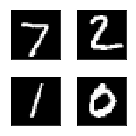

In [104]:
plot_4_digits(raw_X)

# Local test

In [106]:
!mv Dockerfile ../Dockerfile

In [118]:
!dev_appserver.py app.yaml

WARNING  2018-07-25 00:22:26,072 devappserver2.py:114] *** Notice ***
In a few weeks dev_appserver will default to using the Cloud Datastore Emulator. We strongly recommend you to enable this change earlier.
To opt-in, run dev_appserver with the flag --support_datastore_emulator=True
Read the documentation: https://cloud.google.com/appengine/docs/standard/python/tools/migrate-cloud-datastore-emulator
Help us validate that the feature is ready by taking this survey: https://goo.gl/forms/UArIcs8K9CUSCm733
Report issues at: https://issuetracker.google.com/issues/new?component=187272

INFO     2018-07-25 00:22:26,086 devappserver2.py:158] Skipping SDK update check.
INFO     2018-07-25 00:22:26,204 api_server.py:274] Starting API server at: http://localhost:49464
INFO     2018-07-25 00:22:26,209 dispatcher.py:270] Starting module "default" running at: http://localhost:8080
INFO     2018-07-25 00:22:26,211 admin_server.py:152] Starting admin server at: http://localhost:8000
/Users/shiwang/De

KeyboardInterrupt: 

http://localhost:8080/api/test

In [14]:
!mv ../Dockerfile Dockerfile

# Deploy

---
gcloud app deploy

---